## MNIST 예제 CNN 딥러닝 분류

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist 

### MNIST 데이터 로드 및 확인

In [41]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print("Training data shape:", train_X.shape) 
print("Test data shape:", test_X.shape)   

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### 데이터 시각화 (첫 번째 이미지)

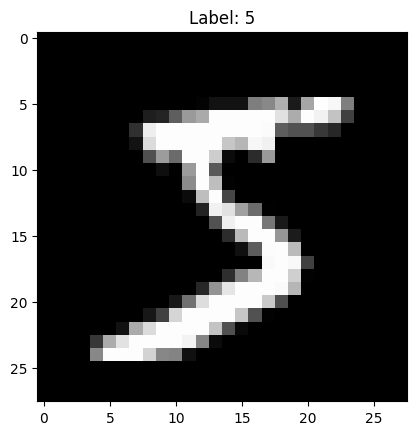

In [43]:
plt.imshow(train_X[0], cmap='gray')
plt.title(f"Label: {train_y[0]}")
plt.show()

### 5가지 분류 (RF, DT, LR, KNN, SVM) 하고, accuracy 및 confusion matrix 확인

#### 데이터 전처리 - 1차원 벡터로 변환 및 정규화

In [46]:
train_X_flat = train_X.reshape(train_X.shape[0], -1) / 255.0
test_X_flat = test_X.reshape(test_X.shape[0], -1) / 255.0

In [47]:
# 분류기 초기화
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# 모델 학습 및 평가
results = []
for name, clf in classifiers.items():
    clf.fit(train_X_flat, train_y) # 모델 학습
    
    y_pred = clf.predict(test_X_flat)
    acc = accuracy_score(test_y, y_pred)
    cm = confusion_matrix(test_y, y_pred)
    cr = classification_report(test_y, y_pred, zero_division=0)
    f1 = f1_score(test_y, y_pred, average='macro')
    ps = precision_score(test_y, y_pred, average='macro')
    rs = recall_score(test_y, y_pred, average='macro')
    
    results.append((name, acc, cm, cr, f1, ps, rs)) # 결과를 리스트에 저장

# 결과 출력
print("\n=== 모델 성능 비교 ===")
for name, acc, cm, cr, f1, ps, rs in results:
    print(f"\n======={name}=======")
    print(f"Accuracy: {acc:.4f}")
    print(f"f1_score: {f1:.4f}")
    print(f"precision_score: {ps:.4f}")
    print(f"recall_score: {rs:.4f}")
    print(cr)
    


=== 모델 성능 비교 ===

=======Random Forest=======
Accuracy: 0.9706
f1_score: 0.9704
precision_score: 0.9704
recall_score: 0.9704
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


=======Decision Tree=======
Accuracy: 0.8790
f1_score: 0.8774
precision_score: 0.8777
recall_score: 0.8773
       

#### Confusion Matrix 출력

In [49]:
for name, acc, cm, cr, f1, ps, rs in results:
    print(f"\n======={name}=======")
    print("Confusion Matrix:")
    print(cm)


=======Random Forest=======
Confusion Matrix:
[[ 972    1    0    0    0    3    2    1    1    0]
 [   0 1122    2    4    0    2    2    0    2    1]
 [   6    0  999    7    2    0    3    9    6    0]
 [   0    0    7  975    0    8    0   10    8    2]
 [   1    0    2    0  960    0    4    0    2   13]
 [   3    0    0   13    4  857    6    2    6    1]
 [   4    3    0    0    3    4  939    0    5    0]
 [   1    3   17    0    1    0    0  991    2   13]
 [   4    0    5    8    3    8    3    5  931    7]
 [   8    5    1   11   14    1    1    4    4  960]]

=======Decision Tree=======
Confusion Matrix:
[[ 914    0    8    6    5    7   19    3    9    9]
 [   0 1096    8    5    1    4    7    3    9    2]
 [  11    8  888   38   11   14    9   28   21    4]
 [   7    5   31  869    8   38    4    7   22   19]
 [   5    2   13    3  858    7   15   16   17   46]
 [  15    9    5   44    9  740   24    4   29   13]
 [  19    3   12   10   22   19  845    4   19    5]
 [  

### 딥러닝 작업: CNN

#### 데이터 전처리
이미지 데이터 재구성 및 정규화
- reshape(28,28,1) : 28X28픽셀의 흑백 이미지로 전환 (채널 수 = 1)
- /255.0 : 픽셀 값을 0~1 범위로 정규화

In [52]:
train_X_cnn = train_X.reshape(train_X.shape[0], 28, 28, 1) / 255.0
test_X_cnn = test_X.reshape(test_X.shape[0], 28, 28, 1) / 255.0

#### 레이블 원-핫 인코딩

In [76]:
train_y_cnn = to_categorical(train_y, num_classes=10)
test_y_cnn = to_categorical(test_y, num_classes=10)

print("\n=== 데이터셋 Shape ===")
print("train_y_cnn shape:", train_y_cnn.shape)
print("test_y_cnn shape:", test_y_cnn.shape)
print("train_X_cnn shape:", train_X_cnn.shape)
print("test_X_cnn shape:", test_X_cnn.shape)


=== 데이터셋 Shape ===
train_y_cnn shape: (60000, 10)
test_y_cnn shape: (10000, 10)
train_X_cnn shape: (60000, 28, 28, 1)
test_X_cnn shape: (10000, 28, 28, 1)


#### CNN 모델 정의

- Conv2D() : 합성곱 층(특징 추출)
  - 32/64 : 필터(커널) 수
  - kernal_size(3,3) : 3X3크기의 커널
  - activation='relu' : 비선형 활성화 함수
- MaxPooling2D() : 공간 차원 축소 (과적합 방지)
  - pool_size=(2,2) : 2X2 크기의 풀링 창

- Flatten() : 3D텐서를 1D 벡터로 변환 (완전 연결 층 입력용)
- Dense() : 전결합 층 (분류 수행)

In [56]:
cnn_model = Sequential([
    # 첫 번째 합성곱 층
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),

    # 두 번째 합성곱 층
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # 완전 연결 층
    Flatten(),
    Dense(128, activation='relu'),

    # 출력 층 
    Dense(10, activation='softmax')
])

/Users/kimdoyeon/Projects/SchoolProjects/AI-Study/week4/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 모델 컴파일
- optimizer='adam' : 효율적인 경사 하강법 알고리즘
- loss='categorical_crossentropy' : 다중 클래스 분류 손실 함수
- metrics=['accuracy'] : 평가 지표 (정확도)

In [58]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### 모델 학습 (딥러닝 CNN)
- epochs=5 : 전체 데이터를 5회 반복 학습
- batch_size=32 : 한번에 32개 샘플을 사용해 가중치 업데이트

In [60]:
print("\n=== 딥러닝: CNN ===")
cnn_model.fit(train_X_cnn, train_y_cnn, epochs=5, batch_size=32)


=== 딥러닝: CNN ===
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9099 - loss: 0.3063
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9811 - loss: 0.0647
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9831 - loss: 0.0714
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9798 - loss: 0.1921
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9797 - loss: 0.5002


#### CNN 성능지표(f1_score, precision, recall), 혼동행렬(Confusion Matrix) 계산 후 출력

In [62]:
cnn_pred_probs = cnn_model.predict(test_X_cnn) # 예측 확률 계산
# 예측 클래스 결정(클래스 최대값을 최종 예측값으로 선택), axis=1: 최대값
cnn_pred = np.argmax(cnn_pred_probs, axis=1) 

f1 = f1_score(test_y, cnn_pred, average='macro')
precision = precision_score(test_y, cnn_pred, average='macro')
recall = recall_score(test_y, cnn_pred, average='macro')

print("\n=== CNN 성능 지표 ===")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# 혼동행렬 생성: test_y와 cnn_pred를 비교하여 혼동행렬 생성
cnn_cm = confusion_matrix(test_y, cnn_pred)

print("\n=== CNN Confusion Matrix ===")
print(cnn_cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

=== CNN 성능 지표 ===
F1 Score: 0.9758
Precision: 0.9760
Recall: 0.9761

=== CNN Confusion Matrix ===
[[ 967    0    0    0    0    1    8    1    3    0]
 [   0 1125    3    1    3    2    0    0    1    0]
 [   9    1 1007    2    5    0    0    5    3    0]
 [   3    0    3  959    0   37    0    6    2    0]
 [   0    0    0    0  981    0    1    0    0    0]
 [   2    0    1    1    0  879    5    3    1    0]
 [   4    3    0    0    6    4  941    0    0    0]
 [   0    1   11    1    0    1    0 1013    1    0]
 [   6    1    6    1    5    1    6    3  944    1]
 [   6    0    0    1   43    6    0    7    1  945]]
